# 0 - Chargement des données du lab: Introduction et Setup

Avant de commencer ce deuxième lab, nous devons charger les informations importantes vues lors du premier lab.

In [44]:
AES_Sbox = np.array([
    0x63, 0x7C, 0x77, 0x7B, 0xF2, 0x6B, 0x6F, 0xC5, 0x30, 0x01, 0x67, 0x2B, 0xFE, 0xD7, 0xAB, 0x76,
    0xCA, 0x82, 0xC9, 0x7D, 0xFA, 0x59, 0x47, 0xF0, 0xAD, 0xD4, 0xA2, 0xAF, 0x9C, 0xA4, 0x72, 0xC0,
    0xB7, 0xFD, 0x93, 0x26, 0x36, 0x3F, 0xF7, 0xCC, 0x34, 0xA5, 0xE5, 0xF1, 0x71, 0xD8, 0x31, 0x15,
    0x04, 0xC7, 0x23, 0xC3, 0x18, 0x96, 0x05, 0x9A, 0x07, 0x12, 0x80, 0xE2, 0xEB, 0x27, 0xB2, 0x75,
    0x09, 0x83, 0x2C, 0x1A, 0x1B, 0x6E, 0x5A, 0xA0, 0x52, 0x3B, 0xD6, 0xB3, 0x29, 0xE3, 0x2F, 0x84,
    0x53, 0xD1, 0x00, 0xED, 0x20, 0xFC, 0xB1, 0x5B, 0x6A, 0xCB, 0xBE, 0x39, 0x4A, 0x4C, 0x58, 0xCF,
    0xD0, 0xEF, 0xAA, 0xFB, 0x43, 0x4D, 0x33, 0x85, 0x45, 0xF9, 0x02, 0x7F, 0x50, 0x3C, 0x9F, 0xA8,
    0x51, 0xA3, 0x40, 0x8F, 0x92, 0x9D, 0x38, 0xF5, 0xBC, 0xB6, 0xDA, 0x21, 0x10, 0xFF, 0xF3, 0xD2,
    0xCD, 0x0C, 0x13, 0xEC, 0x5F, 0x97, 0x44, 0x17, 0xC4, 0xA7, 0x7E, 0x3D, 0x64, 0x5D, 0x19, 0x73,
    0x60, 0x81, 0x4F, 0xDC, 0x22, 0x2A, 0x90, 0x88, 0x46, 0xEE, 0xB8, 0x14, 0xDE, 0x5E, 0x0B, 0xDB,
    0xE0, 0x32, 0x3A, 0x0A, 0x49, 0x06, 0x24, 0x5C, 0xC2, 0xD3, 0xAC, 0x62, 0x91, 0x95, 0xE4, 0x79,
    0xE7, 0xC8, 0x37, 0x6D, 0x8D, 0xD5, 0x4E, 0xA9, 0x6C, 0x56, 0xF4, 0xEA, 0x65, 0x7A, 0xAE, 0x08,
    0xBA, 0x78, 0x25, 0x2E, 0x1C, 0xA6, 0xB4, 0xC6, 0xE8, 0xDD, 0x74, 0x1F, 0x4B, 0xBD, 0x8B, 0x8A,
    0x70, 0x3E, 0xB5, 0x66, 0x48, 0x03, 0xF6, 0x0E, 0x61, 0x35, 0x57, 0xB9, 0x86, 0xC1, 0x1D, 0x9E,
    0xE1, 0xF8, 0x98, 0x11, 0x69, 0xD9, 0x8E, 0x94, 0x9B, 0x1E, 0x87, 0xE9, 0xCE, 0x55, 0x28, 0xDF,
    0x8C, 0xA1, 0x89, 0x0D, 0xBF, 0xE6, 0x42, 0x68, 0x41, 0x99, 0x2D, 0x0F, 0xB0, 0x54, 0xBB, 0x16
])

# 1 - Prétraitement

Le prétraitement est une étape importante en Deep Learning. Cela consiste à transformer les données brutes en un format propre et utilisable, garantissant que les algorithmes peuvent analyser et apprendre efficacement à partir des données. [(Source)](https://www.astera.com/fr/type/blog/data-preprocessing/)

Dans cette section, nous allons **télécharger** les données, les **visualiser**, afin de mieux comprendre les caractéristiques des données avec lesquels on travaille. Enfin, nous allons définir le modèle de fuite, afin de définir les classes, et nous allons séparer les données pour entraîner et tester notre modèle.

## 1.1 - Téléchargement des données

In [45]:
import os

if not os.path.exists("ascad-variable.h5"):
    !wget https://static.data.gouv.fr/resources/ascad-atmega-8515-variable-key/20190903-083349/ascad-variable.h5
else:
    print("Data already downloaded")

Data already downloaded


In [46]:
import sys
import h5py
import numpy as np

# Source : https://github.com/ANSSI-FR/ASCAD
def load_ascad(ascad_database_file, load_metadata=False, target_byte=2):
	check_file_exists(ascad_database_file)
	# Open the ASCAD database HDF5 for reading
	try:
		in_file	 = h5py.File(ascad_database_file, "r")
	except:
		print("Error: can't open HDF5 file '%s' for reading (it might be malformed) ..." % ascad_database_file)
		sys.exit(-1)
	# Load profiling traces
	X_profiling = np.array(in_file['Profiling_traces/traces'], dtype=np.int8)
	# Load profiling labels
	Y_profiling = np.array(in_file['Profiling_traces/labels'])
	# Load attacking traces
	X_attack = np.array(in_file['Attack_traces/traces'], dtype=np.int8)
	# Load attacking labels
	Y_attack = np.array(in_file['Attack_traces/labels'])
	if load_metadata == False:
		return (X_profiling, Y_profiling), (X_attack, Y_attack)
	else:
		return (X_profiling, Y_profiling), (X_attack, Y_attack), (in_file['Profiling_traces/metadata'], in_file['Attack_traces/metadata'])


def check_file_exists(file_path):
    if os.path.exists(file_path) == False:
        print("Error: provided file path '%s' does not exist!" % file_path)
        sys.exit(-1)
    return

In [47]:
# Chargement des données
ascad_dataset = './ascad-variable.h5'
target_byte = 2
(X_profiling, Y_profiling), (X_attack, Y_attack), (profiling_metadata, attack_metadata) = load_ascad(ascad_dataset, load_metadata=True)

# Load the plaintexts of the profiling traces of the corresponding target byte
profiling_plaintexts = profiling_metadata['plaintext'][:, target_byte].astype(np.uint8)
# Load the target_byte value of the key of the corresponding profiling traces
profiling_keys = profiling_metadata['key'][:, target_byte].astype(np.uint8)
# Calculate the correct label using the plaintext and key byte of the profiling set
created_Y_profiling = AES_Sbox[profiling_plaintexts ^ profiling_keys]
assert (created_Y_profiling == Y_profiling).all(), "Calculated profiling labels are not equal to loaded labels."

# Similar process for attack set
attack_plaintexts = attack_metadata['plaintext'][:, target_byte].astype(np.uint8)
attack_keys =  attack_metadata['key'][:, target_byte].astype(np.uint8)
created_Y_attack = AES_Sbox[attack_plaintexts ^ attack_keys]
assert (created_Y_attack == Y_attack).all(), "Calculated attack labels are not equal to loaded labels."

## 1.2 - Visualisation des données

Une fois les données téléchargées, nous allons les visualiser, afin de comprendre les données utilisées en DLSCA.

### 1.2.1 - X_profiling

Commençons par regarder les données utilisées pour l'apprentissage.

In [48]:
import pandas as pd

df = pd.DataFrame(X_profiling)
df

,0,1,2,3,4,5,6,7,8,9,...,1390,1391,1392,1393,1394,1395,1396,1397,1398,1399
0,-19,-23,-27,-32,-38,-41,-47,-51,-52,-54,...,-67,-72,-76,-77,-81,-83,-85,-86,-85,-87
1,-19,-25,-30,-35,-41,-45,-48,-50,-53,-53,...,-70,-74,-77,-80,-84,-84,-85,-85,-85,-86
2,-20,-26,-28,-32,-40,-43,-48,-51,-53,-56,...,-70,-72,-75,-78,-82,-83,-84,-85,-86,-86
3,-20,-25,-27,-34,-40,-44,-47,-50,-52,-54,...,-69,-73,-76,-80,-83,-84,-85,-84,-84,-84
4,-22,-25,-27,-33,-39,-44,-48,-51,-52,-54,...,-69,-72,-75,-78,-82,-84,-84,-85,-84,-84
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,-22,-21,-26,-30,-35,-41,-45,-50,-52,-53,...,-67,-72,-74,-76,-82,-82,-84,-85,-86,-86
199996,-20,-24,-30,-34,-39,-44,-49,-51,-52,-54,...,-68,-72,-76,-81,-83,-83,-83,-83,-85,-85
199997,-20,-25,-27,-33,-40,-44,-47,-51,-52,-55,...,-69,-71,-75,-78,-83,-83,-83,-83,-85,-86
199998,-22,-23,-28,-31,-37,-43,-47,-51,-51,-53,...,-65,-72,-75,-78,-81,-83,-83,-85,-84,-85


Nous avons des entiers dans $\mathbb{Z}$. Les colonnes correspondent aux différents points d'intérêts ($1400$), c'est-à-dire la consommation électrique à un instant $t$ et les lignes aux différentes traces ($200000$).

In [49]:
# Size of the dataset
print(f'The dataset has {df.shape[0]} rows and {df.shape[1]} columns')

The dataset has 200000 rows and 1400 columns


In [50]:
# Give more precise information for each column (i.e. if there is null value in some columns)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Columns: 1400 entries, 0 to 1399
dtypes: int8(1400)
memory usage: 267.0 MB


Nous allons afficher une trace de consommation électrique du dataset

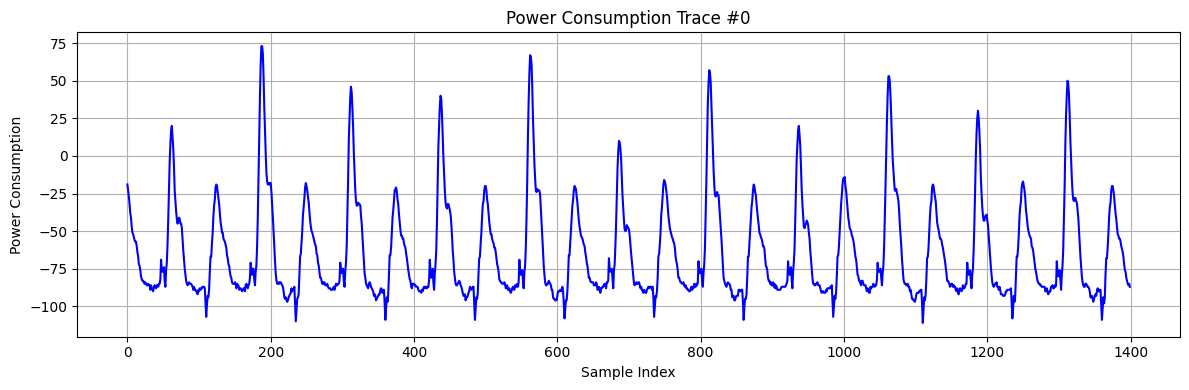

In [51]:
import matplotlib.pyplot as plt
# https://ipython.readthedocs.io/en/stable/interactive/plotting.html
%matplotlib inline

# Plot the first power trace
trace_index = 0
plt.figure(figsize=(12, 4))
plt.plot(X_profiling[trace_index], color='blue')
plt.title(f'Power Consumption Trace #{trace_index}')
plt.xlabel('Sample Index')
plt.ylabel('Power Consumption')
plt.grid(True)
plt.tight_layout()
plt.show()

### 1.2.2 - Y_profiling

Maintenant que nous avons un meilleur aperçu des données utilisées pour entraîner nos modèles, nous allons regarder, les données de sortie.

In [52]:
df_Y_profiling = pd.DataFrame(Y_profiling)
df_Y_profiling

,0
0,125
1,74
2,99
3,114
4,39
...,...
199995,230
199996,240
199997,50
199998,63


Il y a $200000$ lignes, correspondant aux $200000$ traces, avec une seule colonne pour la clé correspondant à la trace.

Nous allons maintenant regarder, s'il y a un nombre équivalent de clé entre les $200000$ sorties, afin de s'assurer que le dataset ne contient pas de biais.

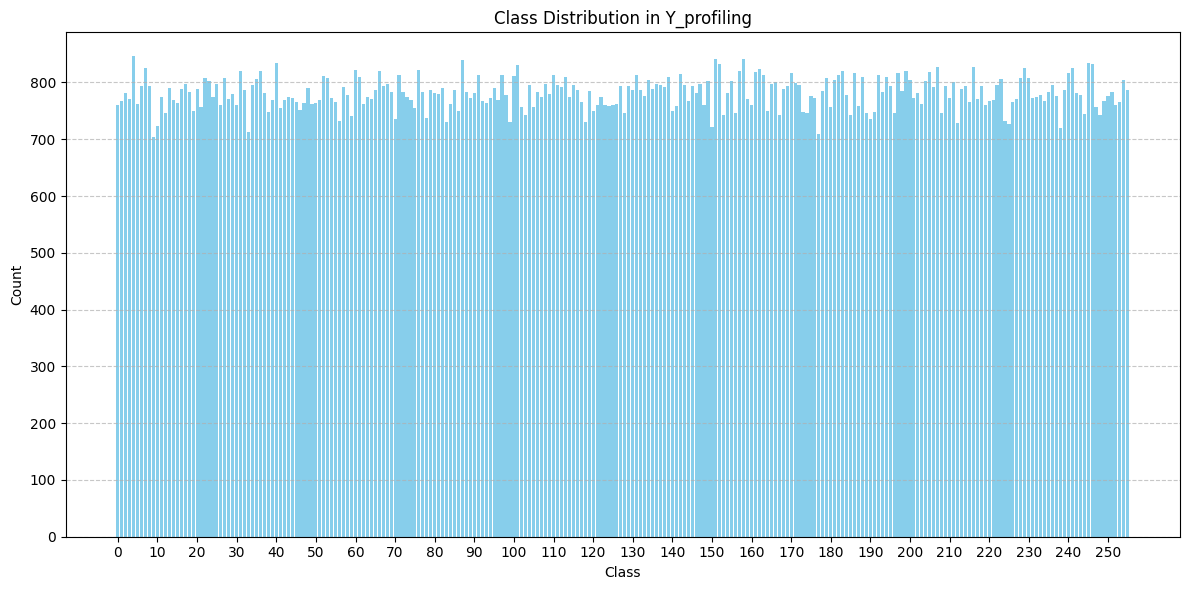

In [53]:
value_counts = df_Y_profiling.value_counts().sort_index()

# If df_Y_profiling is not a Series, convert to Series
if isinstance(df_Y_profiling, pd.DataFrame):
    value_counts = df_Y_profiling.iloc[:, 0].value_counts().sort_index()

# Plot
plt.figure(figsize=(12, 6))
plt.bar(value_counts.index, value_counts.values, color='skyblue')
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Distribution in Y_profiling')
plt.xticks(range(0, 256, 10))  # adjust ticks to avoid overcrowding
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

On observe, que le nombre de chaque clé est plutôt bien équilibré, ce qui ne va pas introduire de biais dans nos modèle.

Nous pouvons donc commencer à travailler dessus, sans avoir à résoudre de potentiels problèmes de biais.

> **Note:** Il est inutile de vérifier sur `X_profiling`, car ce sont des traces de consommations électrique récupérées sur un `ATMEGA8515`, donc il n'y a pas de biais introduit si les clés sont équitablement distribuées.

## 1.3 - Prétraitement pour le Deep Learning

**Définition \[Normalisation]:** Processus d'ajustement des valeurs mesurées sur des échelles différentes à une échelle commune. Il existe différent types de normalisation: *min-max*, *logarithmique*, *échelle décimale* et *moyenne*. [(Source)](https://www.datacamp.com/fr/tutorial/normalization-vs-standardization)

**Définition \[Standardisation]:** Processus transformant les données de manière à ce qu'elles aient une moyenne de $0$ et un écart type de $1$. [(Source)](https://www.datacamp.com/fr/tutorial/normalization-vs-standardization)

$$
X_{std}=\frac{X-\mu}{\sigma}
$$

Avec $X$ est la **valeur originale**, $\mu$ est la **moyenne de la caractéristique**, et $\sigma$ est l'**écart-type** de la caractéristique.

---

La normalisation est plus utilisée sur des **traces désynchronisées**, ce qui n'est pas le cas dans notre dataset actuellement.

In [54]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Standardization
scaler = StandardScaler()
X_profiling = scaler.fit_transform(X_profiling)
X_attack = scaler.transform(X_attack)
# Normalization (between 0 and 1) - Generally this is more for desynchronized traces
# scaler = MinMaxScaler(feature_range=(0, 1))
# X_profiling = scaler.fit_transform(X_profiling)
# X_attack = scaler.transform(X_attack)

### 1.3.2 - Modèle de fuite et Préparation des classes de sortie

Il y a quatre modèles de fuite principaux :
- **Le Poids de Hamming _(HW)_:** Nombre de bits qui sont à 1 [(Source)](https://link.springer.com/book/10.1007/978-0-387-38162-6);
    - Il y a $9$ classes.
- **La Distance de Hamming _(HD)_:** Compte le nombre de transitions de $0 \xrightarrow{} 1$ et $1 \xrightarrow{} 0$ qui ont lieu dans un circuit numérique pendant un certain intervalle de temps [(Source)](https://link.springer.com/book/10.1007/978-0-387-38162-6);
    - Il y a $9$ classes.
- **L’identité _(ID)_:** Utilisant directement l’IV [(Source)](https://eprint.iacr.org/2025/471.pdf);
    - Il y a $256$ classes.
- Un modèle de fuite par bit où nous **sélectionnons un bit spécifique de l’IV** [(Source)](https://eprint.iacr.org/2025/471.pdf).


> **Note:** Pour la suite de cette section, nous allons nous concentrer sur le modèle de fuite : **identité (ID)**.

In [55]:
from tensorflow.keras.utils import to_categorical

# Depending on the leakage model, we have different number of classes for the classification
leakage_model = 'ID'
if leakage_model == 'HW':
  nb_classes = 9
elif leakage_model == 'ID':
  nb_classes = 256

if leakage_model == 'HW':
  Y_profiling = calculate_HW(Y_profiling)
  Y_attack = calculate_HW(Y_attack)

# Since we use classification, we turn the the label values into categorical
Y_profiling = to_categorical(Y_profiling, num_classes=nb_classes)
Y_attack = to_categorical(Y_attack, num_classes=nb_classes)

# 2 - Augmentation des données

Une fois la base de données chargée et prétraité, il est parfois nécessaire de générer des données fictives, afin d'augmenter la taille de la BDD.

Dans le cas des SCA, le rôle de l'augmentation des données est principalement d'émuler les effets des contre-mesures de dissimulation (hiding) afin de généraliser le réseau neuronal face à ces transformations.

In [56]:
import random
import tensorflow as tf
import tensorflow.keras as tk
from tensorflow.keras.models import *
from tensorflow.keras.optimizers import *
from tensorflow.keras import layers
from tensorflow.keras.layers import *
import gc

# set a random seed for reproducibility (running with the given numbers should lead to the same results)
seed = 2770010422235544677 #random.randrange(sys.maxsize)
random.seed(seed)
# print('seed random was', seed)
seed = 512451064 #random.randrange(2**32 - 1)
np.random.seed(seed)
# print('seed np random was', seed)

In [57]:
# Adding Gaussian noise
def data_augmentation_noise(orig_x_prof, num_repeats=2, std=0.01):
  # create copy of original
  new_x_prof = orig_x_prof.copy()
  nb_orig_traces = len(orig_x_prof)

  # repeat it n times
  new_x_prof = np.tile(new_x_prof, (num_repeats, 1))

  # add gaussian noise to added traces (original traces remain without additional noise)
  new_x_prof[nb_orig_traces:] += np.random.normal(0, std, new_x_prof[nb_orig_traces:].shape)
  return new_x_prof

La fonction `data_augmentation_noise` permet d'ajouter du bruit à nos traces, afin de généraliser notre modèle, en cas de capture de trace de consommation comportant du bruit *(ce qui est généralement le cas dans le monde réel)*.

In [58]:
# Adding random shifts
def data_augmentation_shift(orig_x_prof, num_repeats=2, max_shift=10):
  # create copy of original
  new_x_prof = orig_x_prof.copy()
  nb_orig_traces = len(orig_x_prof)

  # repeat it n times
  new_x_prof = np.tile(new_x_prof, (num_repeats, 1))

  # shift each trace randomly using np roll function
  for i in range(len(new_x_prof[nb_orig_traces:])):
    shift = random.randint(-max_shift, max_shift)
    new_x_prof[nb_orig_traces+i] = np.roll(new_x_prof[nb_orig_traces+i], shift)
  return new_x_prof

La fonction `data_augmentation_shift` permet de décaler nos traces de manière aléatoire, afin que celles-ci ne soient plus alignées. Cela rend l'apprentissage plus complexe, et nous rapproche de condition réelle, où la majorité des traces ne sont pas alignées.

> **Note:** Les traces sont alignées, lorsque tous les points d'intérêts des traces sont au même endroit. 

In [63]:
# Functions for returning GE vector for increasing number of traces
def score_keys_convergence(predictions, plaintexts):
  """
  Computes the scores for each key hypothesis
  """
  scores_keys = np.zeros((256, predictions.shape[0]))
  for k in range(256):
    # Generate Hypothetical labels for a key-candidate k
    hypothetical_labels = AES_Sbox[plaintexts ^ k]
    if leakage_model == "HW":
      hypothetical_labels = calculate_HW(hypothetical_labels)

    for i in range(predictions.shape[0]):
      scores_keys[k, i] = scores_keys[k,i-1] + predictions[i, hypothetical_labels[i]]
  return scores_keys
    

def guessing_entropy_convergence(predictions, plaintexts, correct_key, nb_traces, nb_attacks=100):
  ranks = np.zeros((nb_attacks, nb_traces))
  # Take log of probablities to sum later with small addition for numeric stability
  predictions_log = np.log(predictions + 1e-36)

  for attack in range(nb_attacks):
    # Take random subset of traces
    r = np.random.choice(
            range(predictions_log.shape[0]), nb_traces, replace=False)

    key_scores = score_keys_convergence(predictions_log[r], plaintexts[r])

    for n in range(nb_traces):
      order_keys = np.argsort(key_scores[:, n])[::-1]
      ranks[attack, n]  = np.where(order_keys == correct_key)[0][0]
  return np.median(ranks, axis=0), np.average(ranks, axis=0)

    
def best_mlp_id_opoi_1400_ascadr(classes, number_of_samples):
    # Best multilayer perceptron for ASCAD variable key dataset
    # Number of points-of-interest: 1400
    # Leakage model: ID
    # POI interval: [80945, 82345]
    # Number of parameters: 34236

    batch_size = 100
    tf.random.set_seed(83545)
    model = Sequential(name='best_mlp_id_opoi_ascadv_1400')
    model.add(Dense(20, activation='selu', kernel_initializer='random_uniform', input_shape=(number_of_samples,)))
    model.add(Dense(20, activation='selu', kernel_initializer='random_uniform'))
    model.add(Dense(20, activation='selu', kernel_initializer='random_uniform'))
    model.add(Dense(classes, activation='softmax'))
    optimizer = Adam(learning_rate=0.0005)
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model, batch_size

nb_epochs = 100
n_repeats = 2

# Define model
model, batch_size = best_mlp_id_opoi_1400_ascadr(nb_classes, input_size)
nb_prof_traces = 50000
X_prof = X_profiling[:nb_prof_traces]
Y_prof = Y_profiling[:nb_prof_traces]

# Repeat the data n times using tile
Y_prof = np.tile(Y_prof, (n_repeats, 1))

for i in range(nb_epochs):
  new_x = data_augmentation_shift(X_prof, num_repeats=n_repeats)
  model.fit(x=new_x, y=Y_prof, shuffle=True, batch_size=batch_size, verbose=1, epochs=1)
  gc.collect()

1000/1000 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.0039 - loss: 5.5451
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 1s 962us/step - accuracy: 0.0049 - loss: 5.5416
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 1s 721us/step - accuracy: 0.0053 - loss: 5.5368
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 1s 704us/step - accuracy: 0.0059 - loss: 5.5314
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 1s 626us/step - accuracy: 0.0062 - loss: 5.5262
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 1s 635us/step - accuracy: 0.0075 - loss: 5.5218
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 1s 638us/step - accuracy: 0.0076 - loss: 5.5176
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 1s 655us/step - accuracy: 0.0079 - loss: 5.5128
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 1s 623us/step - accuracy: 0.0088 - loss: 5.5065
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 1s 702us/step - accuracy: 0.0085 - loss: 5.5001
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 1s 647us/step - accuracy: 0.0089 - loss: 5.4914
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 1s 633us/step - accuracy: 0.0091 - loss: 5.4830
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 1s 659us/step - accurac

3125/3125 ━━━━━━━━━━━━━━━━━━━━ 1s 184us/step
GE of 0.07 with 915 traces.


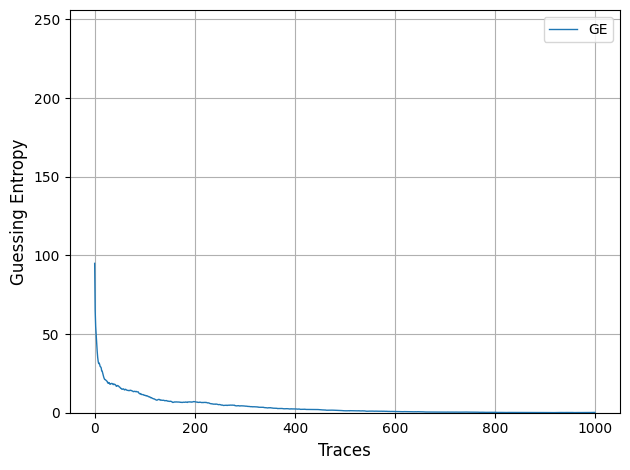

In [60]:
# Code cell that evaluates the DA training and plots the GE convergence.
predictions = model.predict(X_attack)
target_byte = 2
correct_key = attack_metadata["key"][0, target_byte]
medge, avgge = guessing_entropy_convergence(predictions, attack_metadata["plaintext"][:, target_byte], correct_key, 1000)
print(f"GE of {np.min(avgge)} with {np.argmin(avgge)} traces.")
figure = plt.gcf()
plt.plot(avgge, linewidth=1, label="GE")
plt.grid(True, which="both", ls="-")
plt.xlabel("Traces", fontsize=12)
plt.ylabel("Guessing Entropy", fontsize=12)
plt.ylim(0, 256)
plt.legend()
plt.tight_layout()

On remarque que notre modèle performe bien, même avec une simulation de hiding simulé par l'augmentation des données. 

**Exercice:** Créer un nouveau modèle, qui performe mieux après l'augmentation des données: 

In [ ]:
# TODO Code pour l'exercice

# 3 - Sélection des données - OPOI

**Définition \[Optimized Points of Interest _(OPOI)_]:** Avec le scénario OPOI, nous n’utilisons qu’un petit sous-ensemble d’échantillons provenant des traces brutes. Nous allons nous concentrer sur le sous-ensemble correspondant au moment où ont lieu les opérations réalisant la fuite des données.
Nous pouvons faire cela, car nous avons un contrôle total sur l’appareil de profilage. Les principaux avantages sont que la charge de calcul et le nombre de points n’apportant pas d’informations utiles sont plus faciles à gérer [(Source)](https://eprint.iacr.org/2025/471.pdf).

Ci-dessous, vous retrouverez la sélection des données OPOI pour la base de données ASCAD.

In [62]:
def load_ascad_window(ascad_database_file, load_metadata=False, target_byte=2, start_index=45400, end_index=46100):
  check_file_exists(ascad_database_file)
  # Open the ASCAD database HDF5 for reading
  try:
    in_file	 = h5py.File(ascad_database_file, "r")
  except:
    print("Error: can't open HDF5 file '%s' for reading (it might be malformed) ..." % ascad_database_file)
    sys.exit(-1)
  window_traces = in_file['traces'][:50000][start_index:end_index]
  window_attack = in_file['traces'][50000:][start_index:end_index]
  raw_data = in_file['metadata']
  raw_plaintexts = raw_data['plaintext']
  raw_keys = raw_data['key']
  raw_masks = raw_data['masks']
  raw_labels = AES_Sbox[raw_plaintexts[:, target_byte].astype(np.uint8) ^ raw_keys[:, target_byte].astype(np.uint8)]

  # Load profiling labels
  Y_profiling = np.array(raw_labels[:50000])
  # Load attacking labels
  Y_attack = np.array(raw_labels[50000:])
  if load_metadata == False:
    return (window_traces, Y_profiling), (window_attack, Y_attack)
  else:
    return (window_traces, Y_profiling), (window_attack, Y_attack), (in_file['metadata'][:50000], in_file['metadata'][50000:])
ascad_raw = './ASCAD_data/ASCAD_databases/ATMega8515_raw_traces.h5'
load_ascad_window(ascad_raw, load_metadata=True, target_byte=2, start_index=45400, end_index=46100)

((array([[ 54,  49,  42, ..., -20,  -2,  16],
         [ 53,  46,  41, ..., -12,   7,  22],
         [ 55,  50,  44, ..., -21,  -2,  17],
         ...,
         [ 52,  45,  40, ..., -13,   5,  20],
         [ 54,  48,  41, ..., -17,   1,  19],
         [ 57,  53,  46, ..., -25,  -6,  13]], dtype=int8),
  array([ 38,  47,  38, ..., 131,  64,  52])),
 (array([], shape=(0, 100000), dtype=int8),
  array([214,  34,  47, ..., 101, 171, 236])),
 (array([([  6,  65, 195,  66,  25, 182, 248,  19, 159, 132,  97,   6,  46, 137,  42,  16], [ 95,  75, 255, 146, 229,  35,  24,  50,  16, 107, 238,  33,  93,  56, 106, 178], [ 77, 251, 224, 242, 114,  33, 254,  16, 167, 141,  74, 220, 142,  73,   4, 105], [  7,  84,  71, 171, 129, 171,  90, 193, 236, 131,  21, 112, 185,  95, 212,  55]),
         ([ 64,  84, 174, 122,  92, 107, 179,   4, 192,  55,  90, 128, 132,  74, 139,  27], [ 23, 248, 254,  14,  91, 201,   8, 132,  57, 212, 123,  91,  91, 233, 227,  72], [ 77, 251, 224, 242, 114,  33, 254,  16, 167,